Import Libraries:

In [6]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy as np
import qutip as qt
from vae import * 

In [7]:
batch_size = 64
learning_rate = 0.005
lat_dim = 2
hidden_act = "relu"
final_act = "tanh"

Noiseless  
0 Beta 
0.75 Beta 
0 0.1 0.5 Decoherence factor 

Noisy 
0 Beta 
0.75 Beta 
0 0.1 0.5 Decoherence factor 

# Noiseless 0.0 Deco 0.00 Beta

790/790 [==============================] - 0s 444us/step


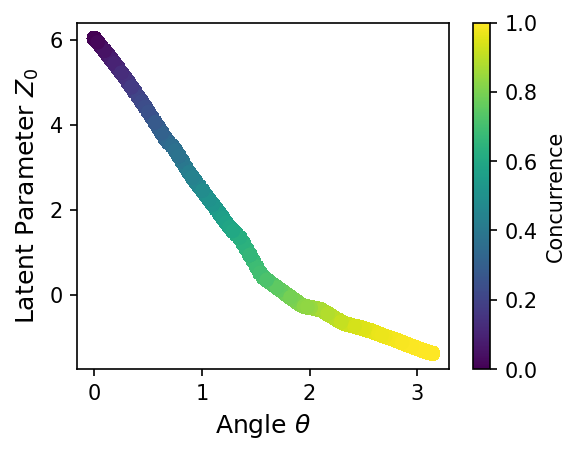

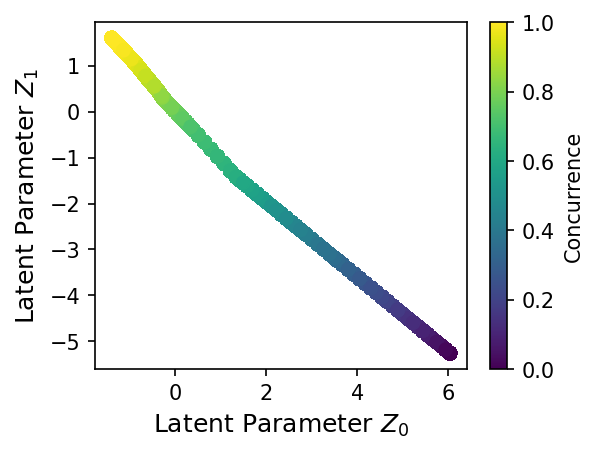

In [51]:
n_angle = 101
n_samples = 1000
beta = 0.0
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco0_lat2_beta0_no.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco0_lat2_beta0_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

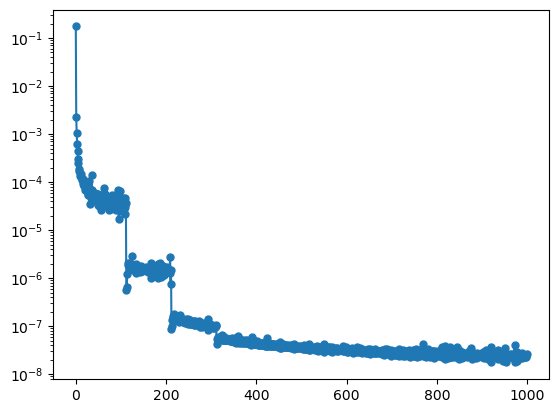

In [98]:
read_dictionary = np.load('/home/felix/Downloads/history_deco0_lat2_beta0_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.1 Deco 0.00 Beta

In [100]:
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_01.npy', mmap_mode="r")

np.reshape(rho_arr[0],(4,4))

memmap([[0.475, 0.45 , 0.   , 0.   ],
        [0.45 , 0.475, 0.   , 0.   ],
        [0.   , 0.   , 0.025, 0.   ],
        [0.   , 0.   , 0.   , 0.025]])

790/790 [==============================] - 0s 425us/step


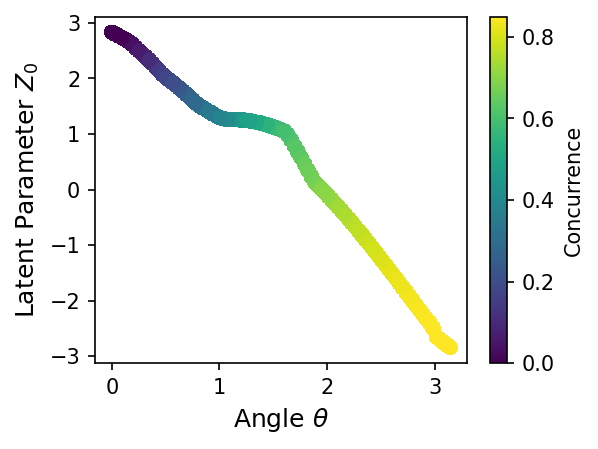

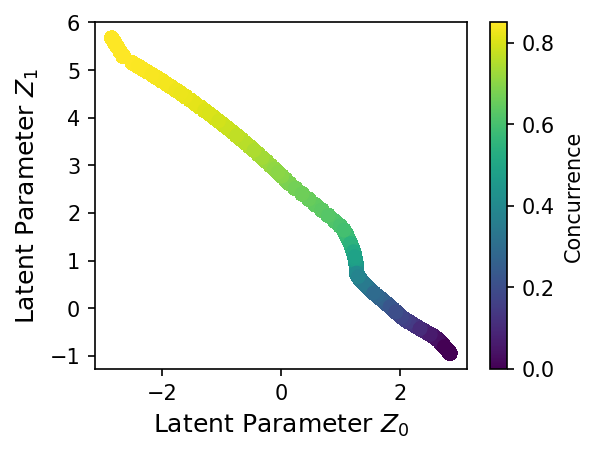

In [52]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco01_lat2_beta0_no.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco01_lat2_beta0_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

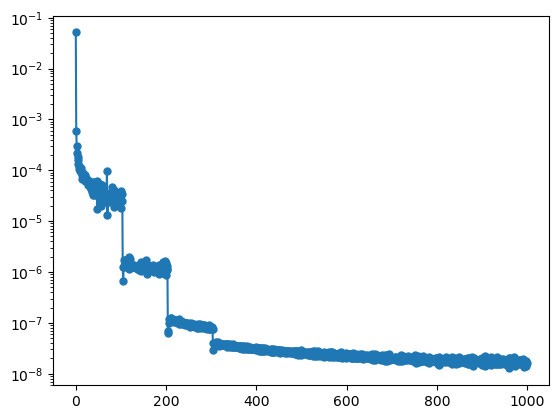

In [82]:
read_dictionary = np.load('/home/felix/Downloads/history_deco01_lat2_beta0_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.5 Deco 0.00 Beta

790/790 [==============================] - 0s 440us/step


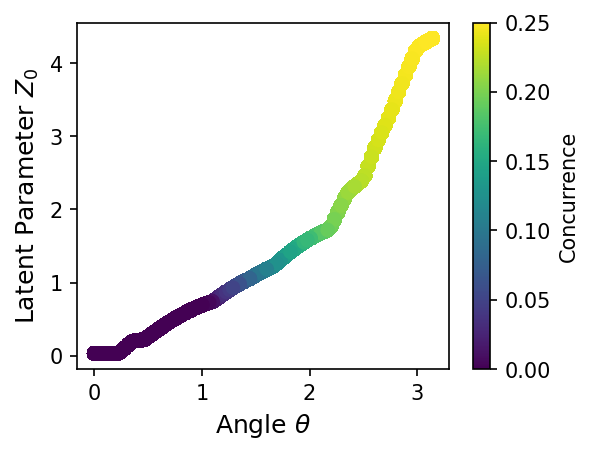

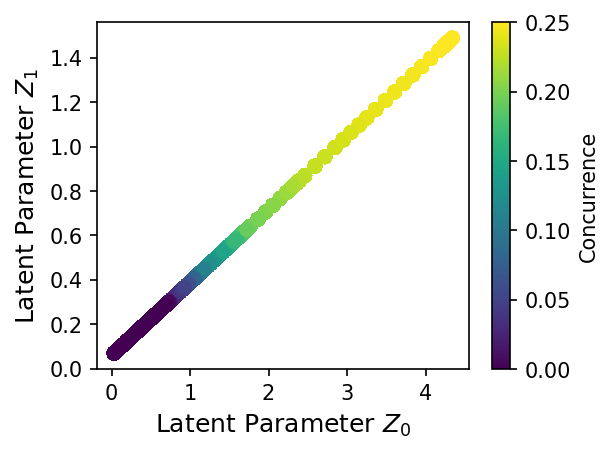

In [53]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco05_lat2_beta0_no.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco05_lat2_beta0_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

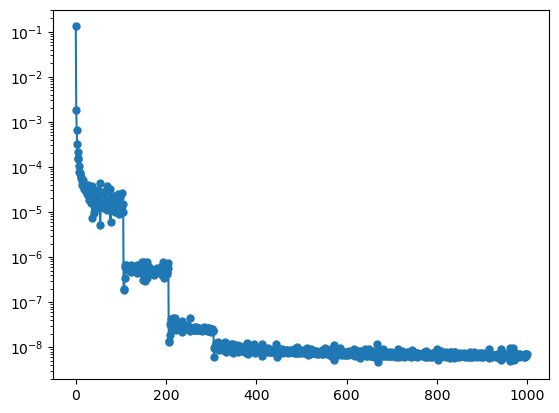

In [83]:
read_dictionary = np.load('/home/felix/Downloads/history_deco05_lat2_beta0_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.0 Deco 0.75 Beta

790/790 [==============================] - 0s 427us/step


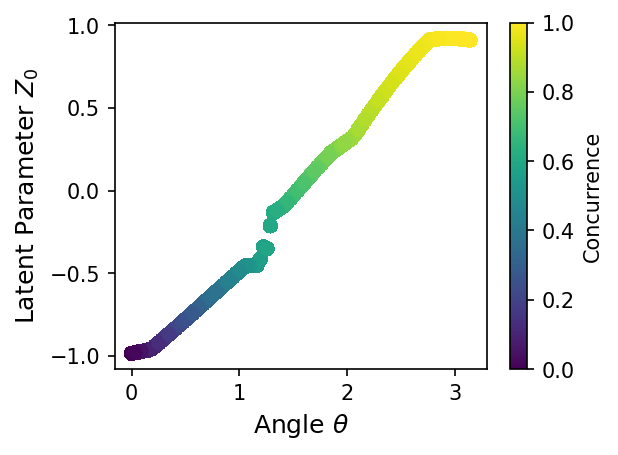

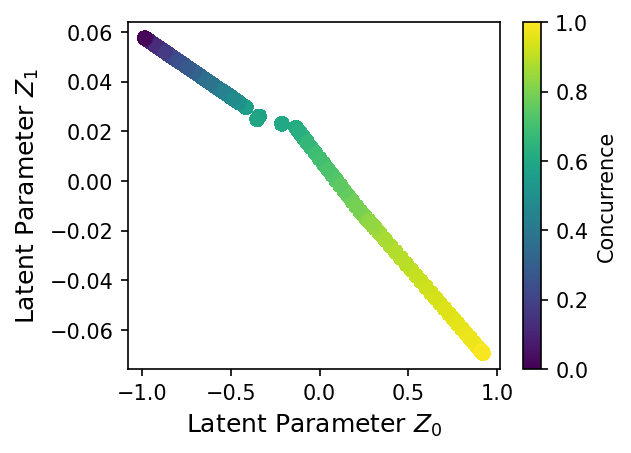

In [54]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco00_lat2_beta075_no.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco00_lat2_beta075_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

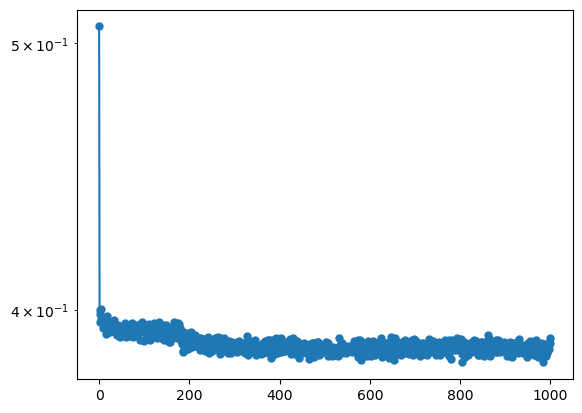

In [84]:
read_dictionary = np.load('/home/felix/Downloads/history_deco00_lat2_beta075_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.1 Deco 0.75 Beta

790/790 [==============================] - 0s 433us/step


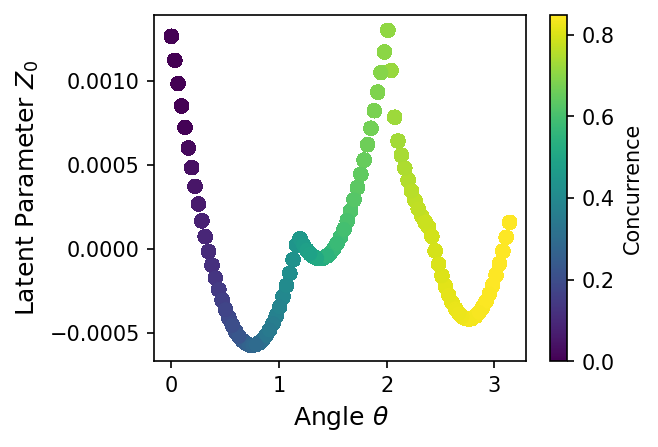

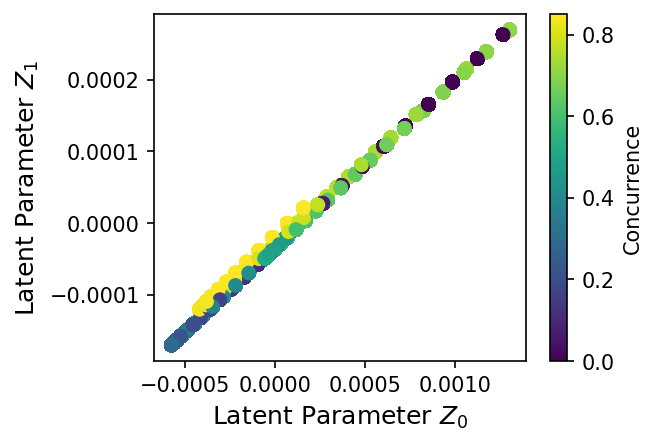

In [55]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco01_lat2_beta075_no.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco01_lat2_beta075_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

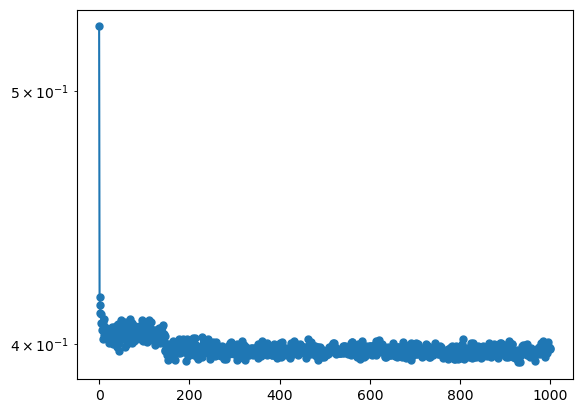

In [85]:
read_dictionary = np.load('/home/felix/Downloads/history_deco01_lat2_beta075_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.5 Deco 0.75 Beta

790/790 [==============================] - 0s 469us/step


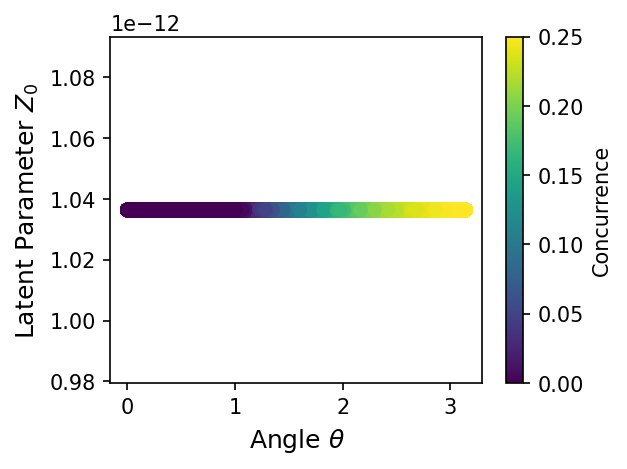

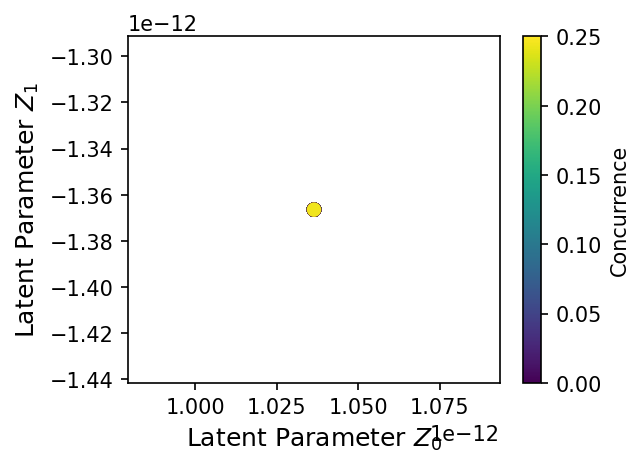

In [56]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco05_lat2_beta075_no.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco05_lat2_beta075_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

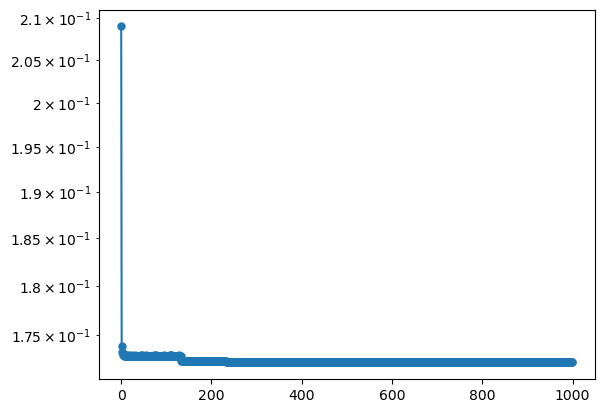

In [86]:
read_dictionary = np.load('/home/felix/Downloads/history_deco05_lat2_beta075_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.0 Deco 0.0 Beta

790/790 [==============================] - 0s 469us/step


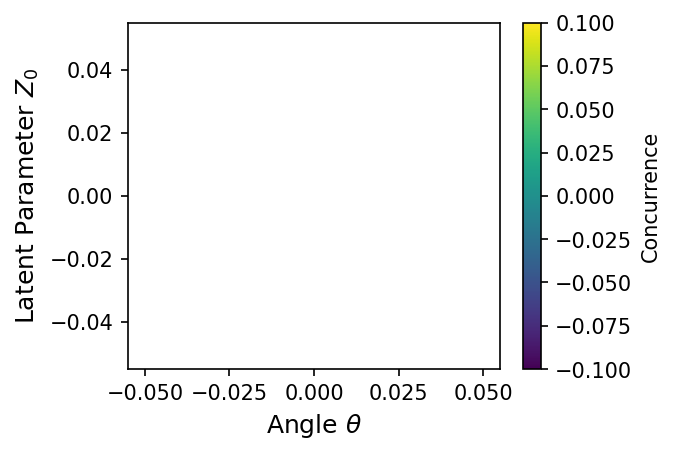

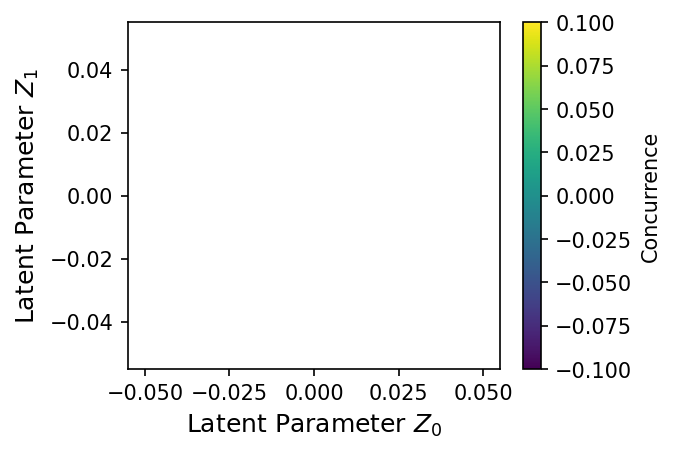

In [57]:
n_angle = 101
n_samples = 1000
beta = 0.0
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco0_lat2_beta0_noise.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco0_lat2_beta0_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

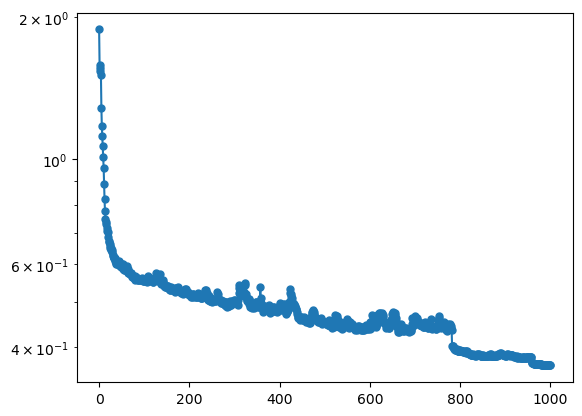

In [87]:
read_dictionary = np.load('/home/felix/Downloads/history_deco0_lat2_beta0_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.1 Deco 0.0 Beta

790/790 [==============================] - 0s 433us/step


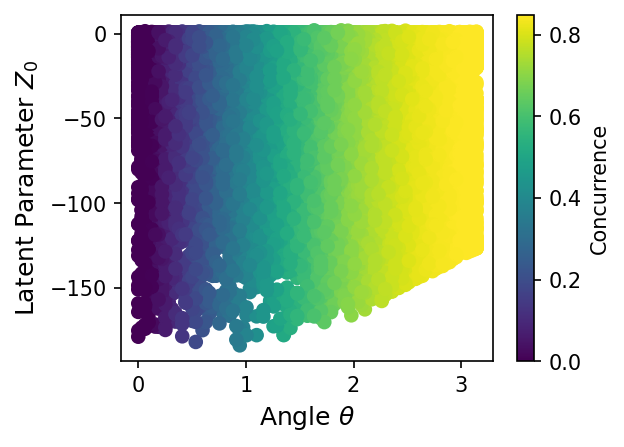

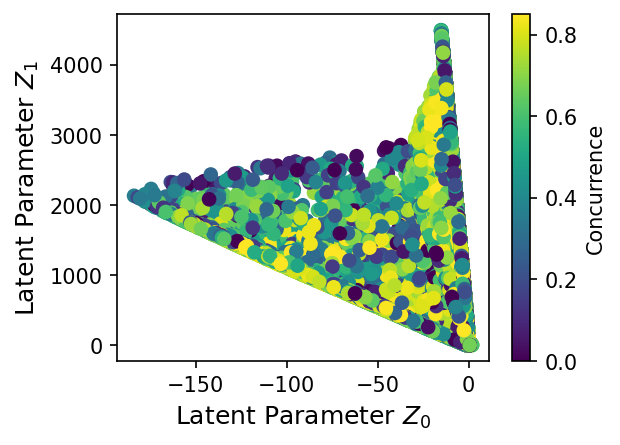

In [58]:
n_angle = 101
n_samples = 1000
beta = 0.0
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco01_lat2_beta0_noise.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco01_lat2_beta0_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

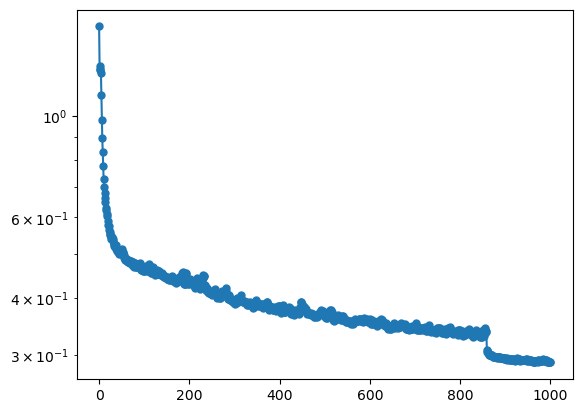

In [79]:
read_dictionary = np.load('/home/felix/Downloads/history_deco01_lat2_beta0_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.5 Deco 0.0 Beta

790/790 [==============================] - 0s 448us/step


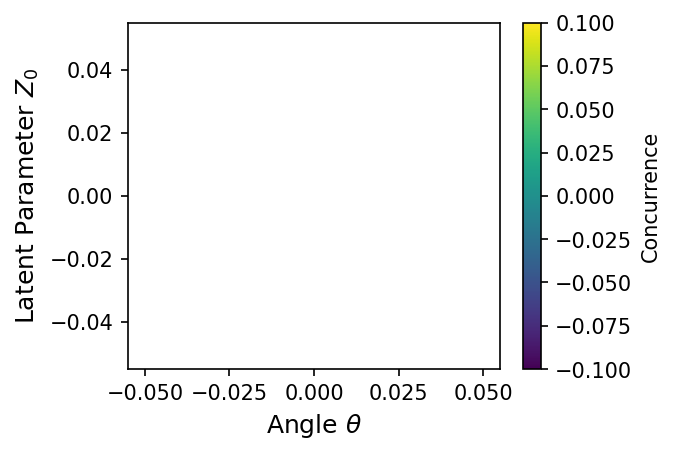

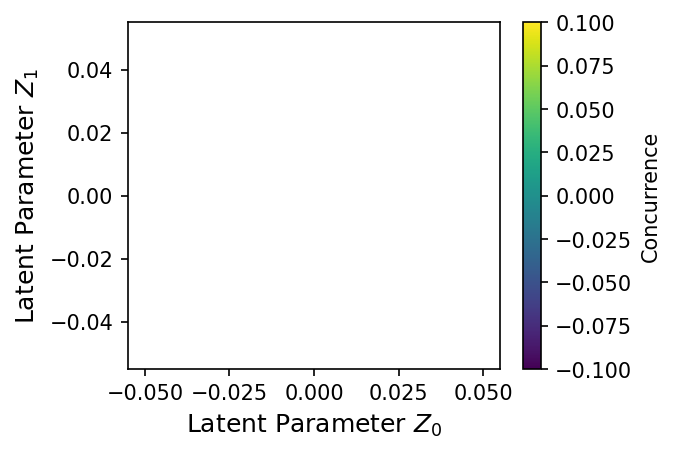

In [96]:
n_angle = 101
n_samples = 1000
beta = 0.0
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco05_lat2_beta0_noise.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco05_lat2_beta0_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

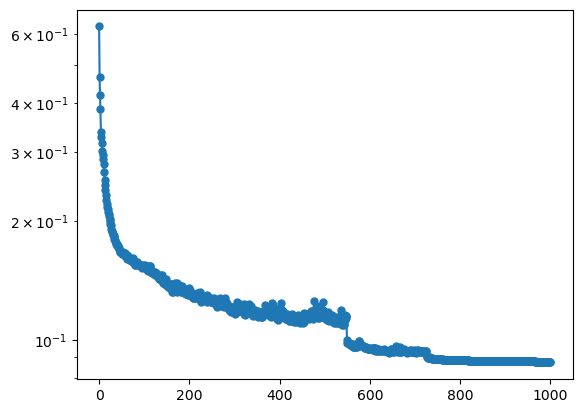

In [78]:
read_dictionary = np.load('/home/felix/Downloads/history_deco05_lat2_beta0_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.0 Deco 0.75 Beta

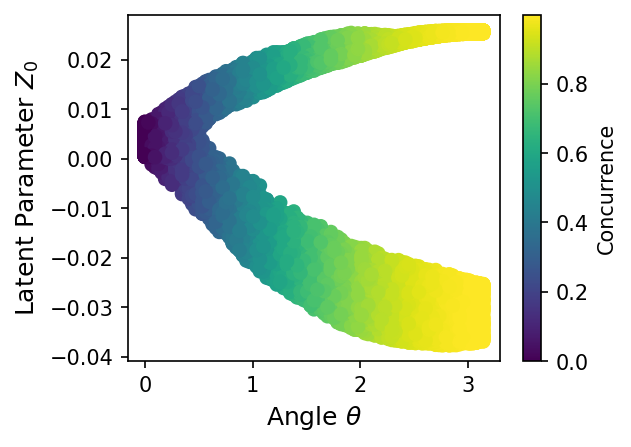

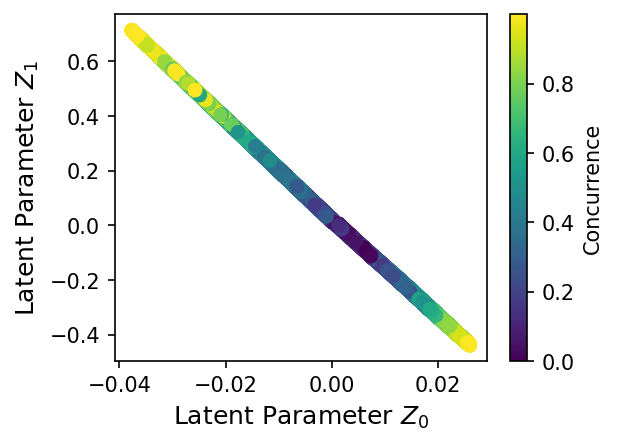

In [94]:
# n_angle = 101
# n_samples = 1000
# beta = 0.75
# rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_00.npy', mmap_mode="r")
# scan_arr = np.linspace(0, np.pi, n_angle)

# alpha_arr = np.zeros(len(rho_arr))
# cnt = 0
# for theta in scan_arr:
#         for _ in (range(n_samples)):
#             alpha_arr[cnt] = theta
#             cnt += 1


# X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


# concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


# encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

# encoder.load_weights("/home/felix/Downloads/encoder_deco00_lat2_beta075_noise.h5")
# decoder.load_weights("/home/felix/Downloads/decoder_deco00_lat2_beta075_noise.h5")

# vae = VAE(encoder, decoder, beta)
# vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
# vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

# z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

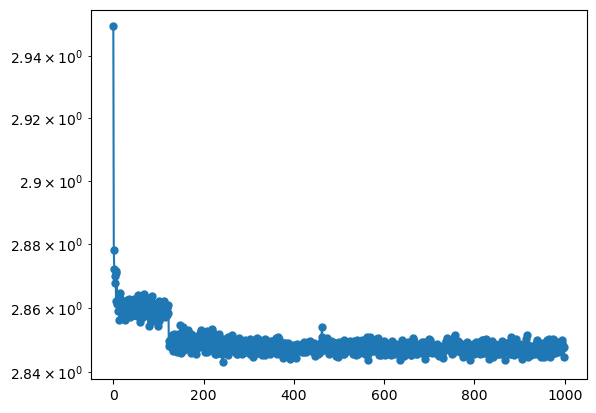

In [77]:
read_dictionary = np.load('/home/felix/Downloads/history_deco00_lat2_beta075_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.1 Deco 0.75 Beta

790/790 [==============================] - 1s 560us/step


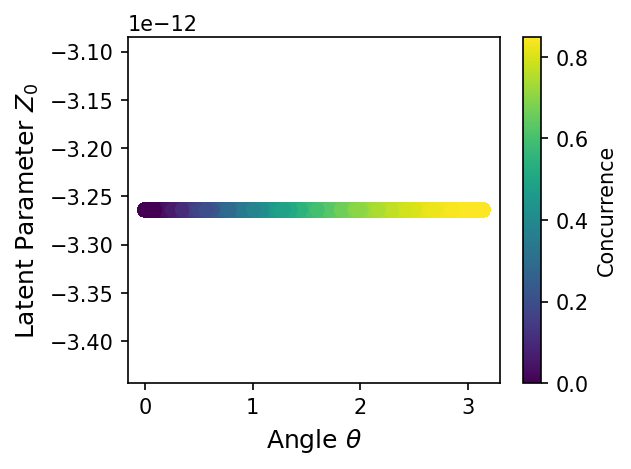

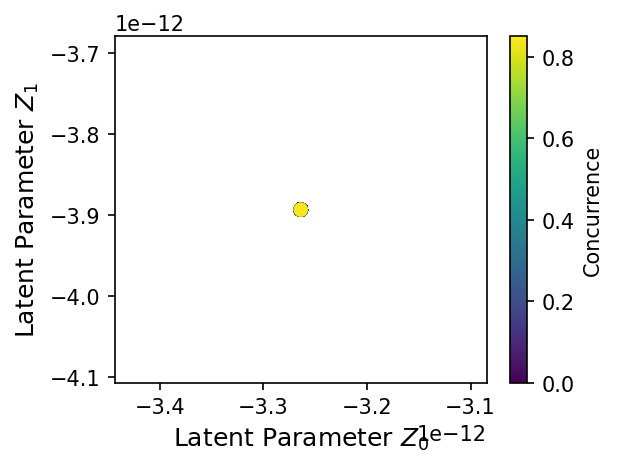

In [101]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco01_lat2_beta075_noise.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco01_lat2_beta075_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

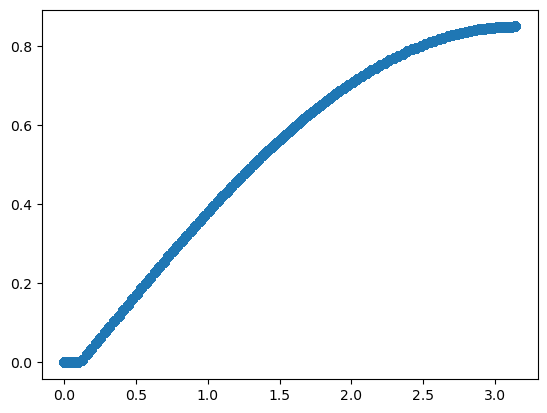

In [102]:
plt.scatter(y_test,concurrence_arr)

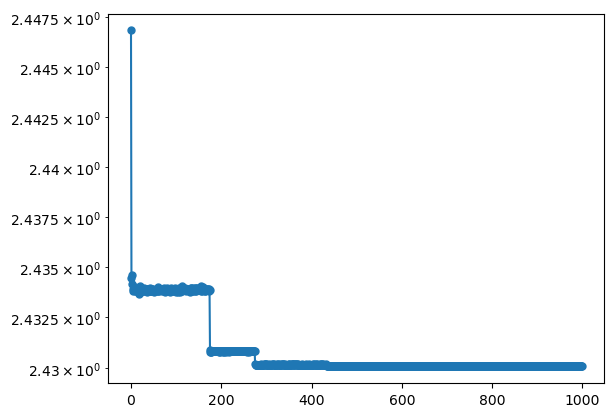

In [76]:
read_dictionary = np.load('/home/felix/Downloads/history_deco01_lat2_beta075_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.5 Deco 0.75 Beta

32/32 [==============================] - 0s 582us/step


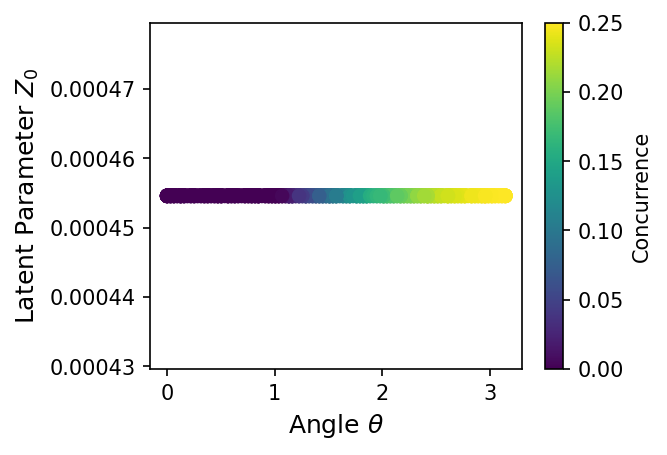

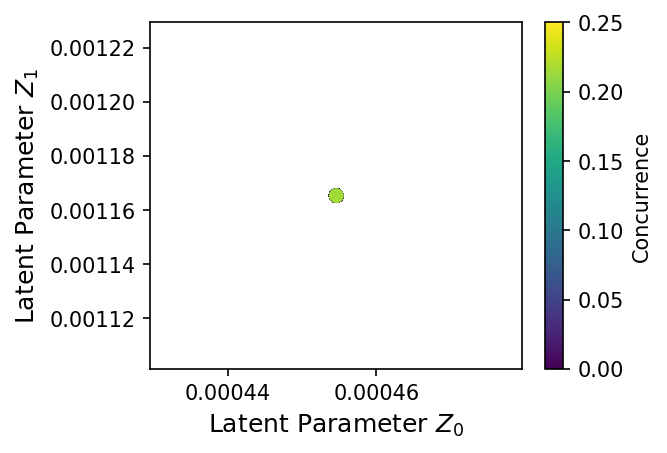

In [62]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

X_test = X_test[:1000]
y_test = y_test[:1000]

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])


encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/encoder_deco05_lat2_beta075_noise.h5")
decoder.load_weights("/home/felix/Downloads/decoder_deco05_lat2_beta075_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

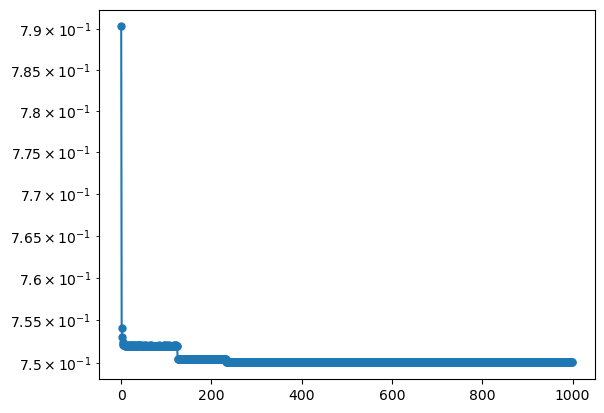

In [75]:
read_dictionary = np.load('/home/felix/Downloads/history_deco05_lat2_beta075_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")